In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
X_train = joblib.load('X_train_clean.pkl')
y_train = joblib.load('y_train.pkl')

In [3]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

,SectionName,PublishedBy,SupTitle,Title,SubTitle,Description,AuthorName,SourceName,Tag,Keyword,Content,FullText,SiteName
304,regional,pythag kurniati,,puting beliung rusak 60 rumah indramayu 5 robo...,,60 rumah rusak akibat terjang angin puting bel...,muhamad syahri romdhon,,indramayu puting beliung indramayu angin putin...,angin puting beliung indramayu puting beliung ...,indramayu kompascom bupati indramayu nina agus...,puting beliung rusak 60 rumah indramayu 5 robo...,REGIONAL
2110,skola,retia kartika dewi,,cari tripel pythagoras awal bilang genap,,tripel pythagoras buah bilang penuh dalil pyth...,retia kartika dewi,,tripel pythagoras tripel pythagoras erti tripe...,cari tripel pythagoras awal bilang genap indon...,kompascom tripel pythagoras buah bilang penuh ...,cari tripel pythagoras awal bilang genap tripe...,SKOLA
1904,news,azwar ferdian,,1000 beli suzuki jimny 5pintu gratis aksesoris,,1000 konsumen open indent jimny 5pintu item ge...,aprida mega nanda,,suv suzuki jimny suzuki jimny 5 pintu jimny 5d...,tenaga jual suzuki jakarta suzuki suzuki jimny...,jakarta kompascom suzuki jimny 5pintu luncur i...,1000 beli suzuki jimny 5pintu gratis aksesoris...,OTOMOTIF
2232,eat good,wisnubrata,,minum obat campur susu,,dokter spesialis anak orangtua akal minum obat...,chrisstella efivania rosaline,,minum obat campur susu minum obat susu minum o...,minum susu minum obat minum obat pakai susu susu,jakarta kompascom anakanak seringkali papar sa...,minum obat campur susu dokter spesialis anak o...,LIFESTYLE
228,nasional,ihsanuddin,,sindir program susu gratis cak imin lambat sd ...,,sd kasi gizi nama lambat amin orangorang lamba...,irfan kamil,,anies baswedan muhaimin iskandar cak imin anie...,,garut kompascom calon wakil presiden cawapres ...,sindir program susu gratis cak imin lambat sd ...,NEWS


In [4]:
# membuat salinan data
df_copy = df.copy()

In [5]:
# mencari panjang text

df_copy['len_text'] = df_copy["FullText"].apply(lambda x: len(x.split()))

Text(0, 0.5, '')

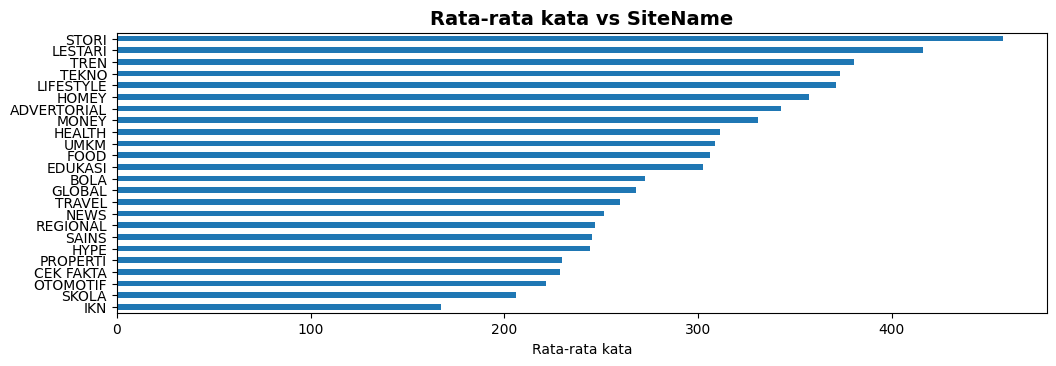

In [6]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1 = df_copy.groupby('SiteName')['len_text'].mean().sort_values().plot(kind="barh")
ax1.set_title("Rata-rata kata vs SiteName", fontsize=14, fontweight = 'bold')
ax1.set_xlabel("Rata-rata kata", fontsize = 10)
ax1.set_ylabel("")

In [7]:
# Menghitung jumlah nilai unik dalam kolom "SiteName"
site_counts = df_copy['SiteName'].value_counts()

# Menghitung jumlah total baris DataFrame
total_rows = len(df_copy)

# Menghitung persentase setiap nilai unik dalam kolom "SiteName"
site_percentage = (site_counts / total_rows) * 100

site_percentage

SiteName
NEWS           21.289919
REGIONAL       20.914214
HYPE            7.952411
OTOMOTIF        7.639324
MONEY           6.762680
TREN            5.823419
BOLA            3.757044
EDUKASI         3.068253
GLOBAL          2.755166
TEKNO           2.442079
HEALTH          2.128992
LIFESTYLE       2.128992
TRAVEL          1.815905
PROPERTI        1.815905
FOOD            1.690670
SKOLA           1.440200
LESTARI         1.314966
HOMEY           1.252348
CEK FAKTA       1.064496
SAINS           1.001879
ADVERTORIAL     0.939261
STORI           0.438322
UMKM            0.438322
IKN             0.125235
Name: count, dtype: float64

Meskipun situs *STORI* hanya memiliki total 0.44% dari seluruh dataset, namun situs *STORI* memiliki rata-rata kata terbanyak dari situs lainnya

In [8]:
grouped_df = df.groupby('SiteName')['FullText'].apply(' '.join).reset_index()
grouped_df

,SiteName,FullText
0,ADVERTORIAL,advertorial govtech indonesia uri garda depan ...
1,BOLA,fakta indonesia vs irak skuad garuda kalah lag...
2,CEK FAKTA,kilas luncur wikipedia 15 januari 2001 januari...
3,EDUKASI,6 beasiswa s1s3 negeri buka 2024 lpdp telkom b...
4,FOOD,resep kastengel bahan sederhana raya imlek sim...
5,GLOBAL,8 orang tewas akibat tembak chicago polisi bur...
6,HEALTH,4 wanita mudah lelah menstruasi salah keluh al...
7,HOMEY,8 tanam hias tumbuh subur kamar tidur hadir ta...
8,HYPE,lirik chord lagu call the shots girls aloud li...
9,IKN,harga tanah kawasan sangga ikn prediksi 10 per...


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Melakukan tokenisasi dan perhitungan frekuensi kata-kata untuk setiap SiteName
word_counts = {}
for site, group in grouped_df.groupby('SiteName'):
    texts = group['FullText'].tolist()
    # Menggunakan CountVectorizer untuk menghitung frekuensi kata-kata
    word_count_vector = vectorizer.fit_transform(texts)
    # Mendapatkan kata-kata dan frekuensinya
    words = vectorizer.get_feature_names_out()
    counts = word_count_vector.toarray().sum(axis=0)
    # Mengambil 5 kata teratas
    top_words = [word for _, word in sorted(zip(counts, words), reverse=True)[:5]]
    word_counts[site] = top_words

# Membuat DataFrame dari hasil
top_words_df = pd.DataFrame(word_counts).T
top_words_df.columns = ['Top Word 1', 'Top Word 2', 'Top Word 3', 'Top Word 4', 'Top Word 5']

# Menampilkan visualisasi
print(top_words_df)


            Top Word 1 Top Word 2 Top Word 3 Top Word 4  Top Word 5
ADVERTORIAL      makan      layan       anak  indonesia       popok
BOLA         indonesia         vs     timnas       main       piala
CEK FAKTA         desa      fakta      video       dana   indonesia
EDUKASI           2024   beasiswa  mahasiswa      jurus      kuliah
FOOD             makan      resep       ayam       baca       bubur
GLOBAL            baca     serang       gaza    ukraina       rusia
HEALTH           darah   diabetes       gula      sebab       sakit
HOMEY           kucing      ruang      tanam       baca       warna
HYPE               the       lagu       baca        you          to
IKN                ikn      bambu      tanah      tanam  masyarakat
LESTARI           anak  indonesia     energi       baca    lingkung
LIFESTYLE        pakai       baca      warna      kulit       makan
MONEY               rp       2024       baca      usaha      persen
NEWS              baca    jakarta   presiden    

Setiap *SiteName* memiliki kata unik yang sering digunakan dalam penulisan artikelnya. Namun, kata `baca` sering muncul di beberapa situs, kita akan mengecek korelasi antar situs

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Membuat TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(grouped_df['FullText'])

# Menghitung cosine similarity antar teks berdasarkan kolom "NameSite"
similarity_df = pd.DataFrame(index=grouped_df['SiteName'], columns=grouped_df['SiteName'])

for i, site1 in enumerate(grouped_df['SiteName']):
    for j, site2 in enumerate(grouped_df['SiteName']):
        cosine_sim = cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])
        similarity_df.loc[site1, site2] = cosine_sim[0][0]

similarity_df

SiteName,ADVERTORIAL,BOLA,CEK FAKTA,EDUKASI,FOOD,GLOBAL,HEALTH,HOMEY,HYPE,IKN,...,OTOMOTIF,PROPERTI,REGIONAL,SAINS,SKOLA,STORI,TEKNO,TRAVEL,TREN,UMKM
SiteName,,,,,,,,,,,,,,,,,,,,,
ADVERTORIAL,1.0,0.097433,0.120073,0.103179,0.110379,0.106935,0.133885,0.082201,0.110908,0.079071,...,0.113094,0.152362,0.183733,0.121431,0.080098,0.066273,0.084869,0.12731,0.221941,0.146713
BOLA,0.097433,1.0,0.151565,0.096882,0.044468,0.095317,0.040819,0.038895,0.063225,0.02518,...,0.101295,0.084677,0.12069,0.057812,0.049754,0.075737,0.054406,0.075062,0.182669,0.054953
CEK FAKTA,0.120073,0.151565,1.0,0.130492,0.062465,0.179959,0.061243,0.047291,0.081839,0.073379,...,0.143558,0.189775,0.266501,0.090399,0.070122,0.082796,0.111167,0.121602,0.272658,0.10228
EDUKASI,0.103179,0.096882,0.130492,1.0,0.058446,0.123354,0.066039,0.046963,0.059564,0.05067,...,0.125053,0.141507,0.182968,0.083705,0.066302,0.061935,0.084704,0.112268,0.266727,0.093868
FOOD,0.110379,0.044468,0.062465,0.058446,1.0,0.077997,0.179267,0.093863,0.040524,0.037104,...,0.089239,0.086938,0.12697,0.139387,0.085632,0.043403,0.056876,0.107512,0.207543,0.088714
GLOBAL,0.106935,0.095317,0.179959,0.123354,0.077997,1.0,0.097712,0.072945,0.081583,0.05844,...,0.143545,0.174431,0.312407,0.134763,0.10266,0.151511,0.08432,0.142708,0.289901,0.09949
HEALTH,0.133885,0.040819,0.061243,0.066039,0.179267,0.097712,1.0,0.079871,0.045639,0.036497,...,0.077657,0.079405,0.152188,0.289852,0.124939,0.044005,0.04581,0.085719,0.423638,0.074234
HOMEY,0.082201,0.038895,0.047291,0.046963,0.093863,0.072945,0.079871,1.0,0.046126,0.07148,...,0.08653,0.107059,0.112156,0.088875,0.080301,0.039609,0.057978,0.087697,0.165976,0.067538
HYPE,0.110908,0.063225,0.081839,0.059564,0.040524,0.081583,0.045639,0.046126,1.0,0.026088,...,0.090206,0.081925,0.126171,0.0516,0.04544,0.054376,0.055938,0.062413,0.134738,0.039733


In [11]:
'''from wordcloud import WordCloud

def combine_text(group):
    return ' '.join(group['FullText'])

# Menggabungkan teks berdasarkan "SiteName"
text_by_site = df_copy.groupby('SiteName').apply(combine_text)

# Membuat word cloud untuk setiap "SiteName"
for site, text in text_by_site.items():
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {site}')
    plt.axis('off')
    plt.show()'''

'from wordcloud import WordCloud\n\ndef combine_text(group):\n    return \' \'.join(group[\'FullText\'])\n\n# Menggabungkan teks berdasarkan "SiteName"\ntext_by_site = df_copy.groupby(\'SiteName\').apply(combine_text)\n\n# Membuat word cloud untuk setiap "SiteName"\nfor site, text in text_by_site.items():\n    wordcloud = WordCloud(width=400, height=200, background_color=\'white\').generate(text)\n    plt.figure(figsize=(10, 6))\n    plt.imshow(wordcloud, interpolation=\'bilinear\')\n    plt.title(f\'Word Cloud for {site}\')\n    plt.axis(\'off\')\n    plt.show()'

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Fungsi untuk melakukan analisis sentimen pada teks
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    # Mengembalikan label sentimen berdasarkan nilai komponen sentimen
    if sentiment['compound'] > 0:
        return 'Positive'
    elif sentiment['compound'] < 0 :
        return 'Negative'
    else:
        return 'Neutral'

# Menambahkan kolom sentimen ke dataframe
df['Sentiment'] = df['FullText'].apply(analyze_sentiment)

df.head()


,SectionName,PublishedBy,SupTitle,Title,SubTitle,Description,AuthorName,SourceName,Tag,Keyword,Content,FullText,SiteName,Sentiment
304,regional,pythag kurniati,,puting beliung rusak 60 rumah indramayu 5 robo...,,60 rumah rusak akibat terjang angin puting bel...,muhamad syahri romdhon,,indramayu puting beliung indramayu angin putin...,angin puting beliung indramayu puting beliung ...,indramayu kompascom bupati indramayu nina agus...,puting beliung rusak 60 rumah indramayu 5 robo...,REGIONAL,Neutral
2110,skola,retia kartika dewi,,cari tripel pythagoras awal bilang genap,,tripel pythagoras buah bilang penuh dalil pyth...,retia kartika dewi,,tripel pythagoras tripel pythagoras erti tripe...,cari tripel pythagoras awal bilang genap indon...,kompascom tripel pythagoras buah bilang penuh ...,cari tripel pythagoras awal bilang genap tripe...,SKOLA,Neutral
1904,news,azwar ferdian,,1000 beli suzuki jimny 5pintu gratis aksesoris,,1000 konsumen open indent jimny 5pintu item ge...,aprida mega nanda,,suv suzuki jimny suzuki jimny 5 pintu jimny 5d...,tenaga jual suzuki jakarta suzuki suzuki jimny...,jakarta kompascom suzuki jimny 5pintu luncur i...,1000 beli suzuki jimny 5pintu gratis aksesoris...,OTOMOTIF,Positive
2232,eat good,wisnubrata,,minum obat campur susu,,dokter spesialis anak orangtua akal minum obat...,chrisstella efivania rosaline,,minum obat campur susu minum obat susu minum o...,minum susu minum obat minum obat pakai susu susu,jakarta kompascom anakanak seringkali papar sa...,minum obat campur susu dokter spesialis anak o...,LIFESTYLE,Neutral
228,nasional,ihsanuddin,,sindir program susu gratis cak imin lambat sd ...,,sd kasi gizi nama lambat amin orangorang lamba...,irfan kamil,,anies baswedan muhaimin iskandar cak imin anie...,,garut kompascom calon wakil presiden cawapres ...,sindir program susu gratis cak imin lambat sd ...,NEWS,Positive


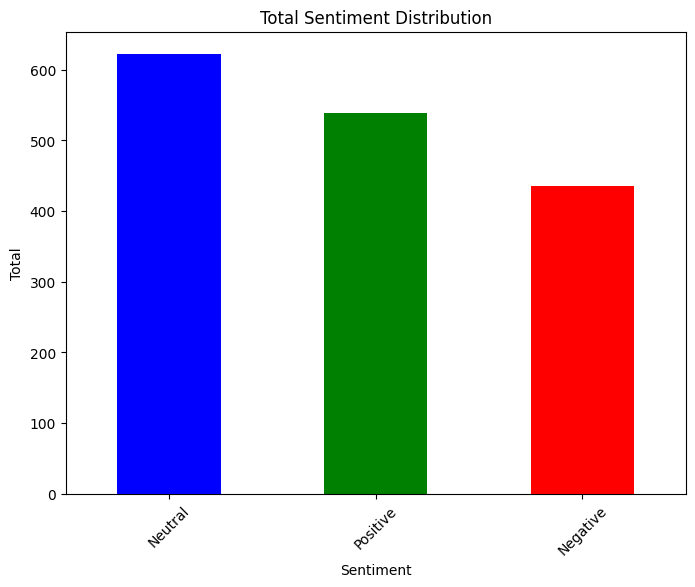

In [14]:
import matplotlib.pyplot as plt

# Menghitung jumlah kemunculan setiap sentimen
sentiment_counts = df['Sentiment'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Total Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()
